# Import necessary libraries

In [1]:
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

In [2]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Wrangling

In [3]:
df['date']=pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

# Exploratory Data Analysis (EDA)

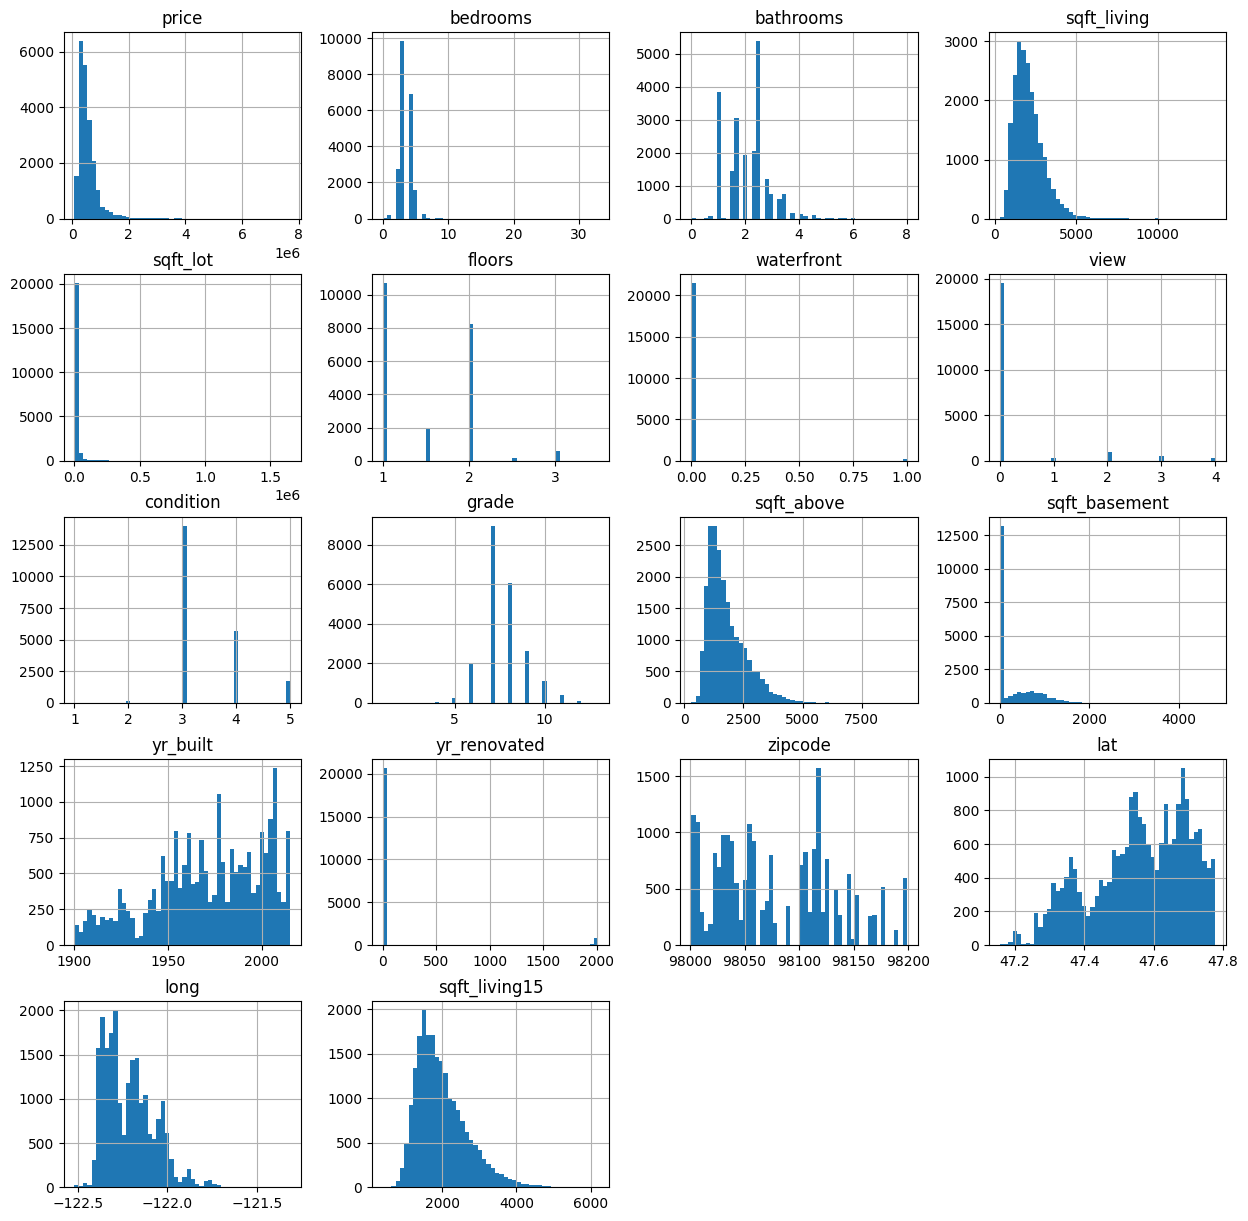

In [5]:
df.drop(columns=['date', 'id', 'sqft_lot15']).hist(bins=50,figsize=(15,15))
plt.show()

<Axes: xlabel='waterfront', ylabel='price'>

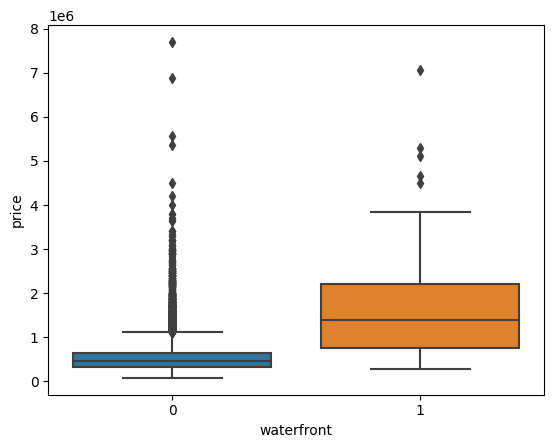

In [6]:
#determine whether houses with a waterfront view or without a waterfront view have more price outliers.
sns.boxplot(data=df,x=df['waterfront'],y=df['price'])

<Axes: xlabel='sqft_above', ylabel='price'>

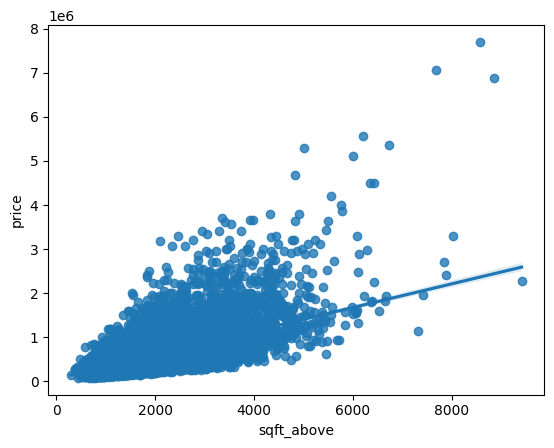

In [7]:
#determine if the feature sqft_above is negatively or positively correlated with price.

sns.regplot(data=df,x=df['sqft_above'],y=df['price'])

(21.5, -0.5)

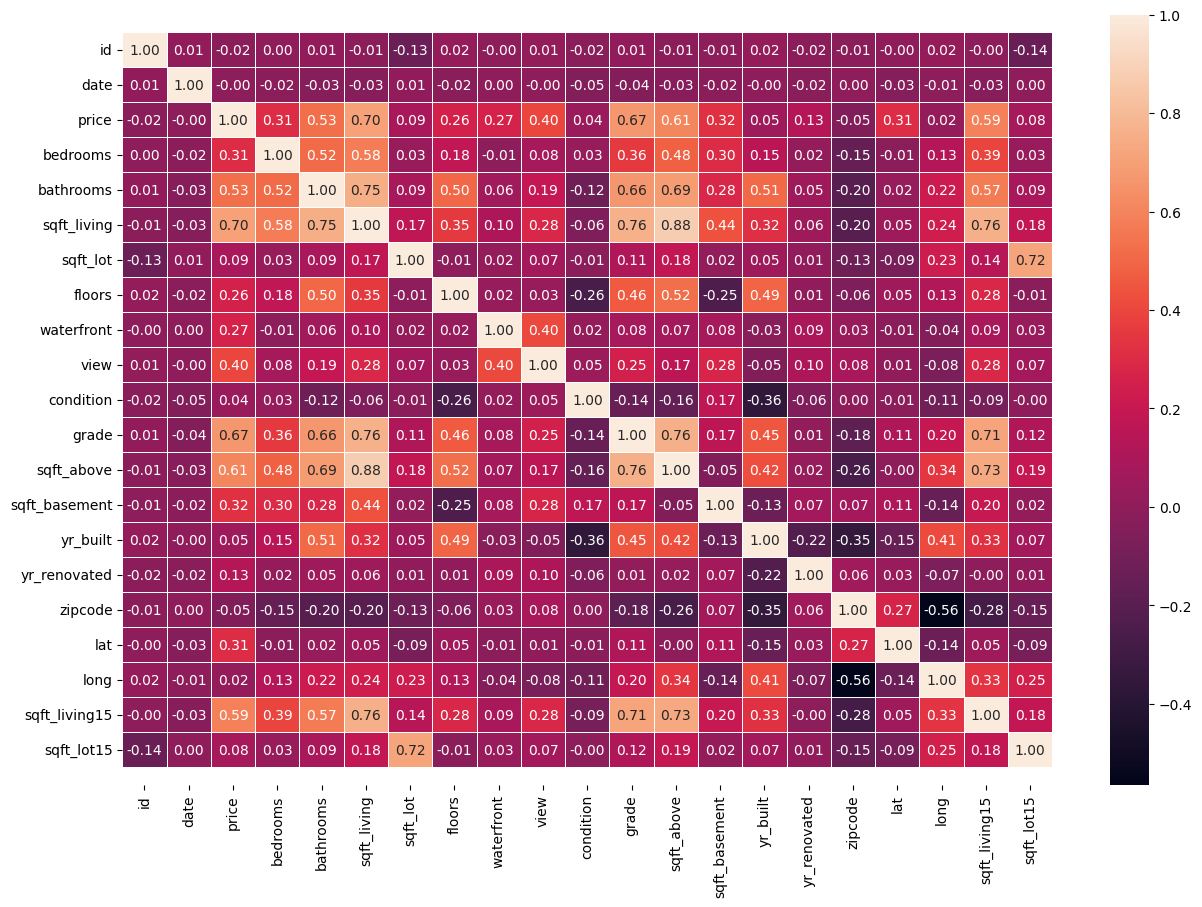

In [8]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Separate features and target variable

In [9]:
X = df.drop(columns=['price', 'date'])  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regression model

In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model

In [12]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Make predictions on the test set

In [13]:
y_pred = model.predict(X_test)

# Evaluate the model

In [14]:
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', RMSE)

R2_Score = r2_score(y_test,y_pred)
print('R2 Score is : ', R2_Score)

Root Mean Squared Error: 147943.0977487057
R2 Score is :  0.8552213509293962
